<a href="https://colab.research.google.com/github/Rrdesh07/BestMealonline/blob/main/experiment%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Flatten
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train/255.0 , x_test/255.0 

11490434/11490434 [==============================] - 0s 0us/step


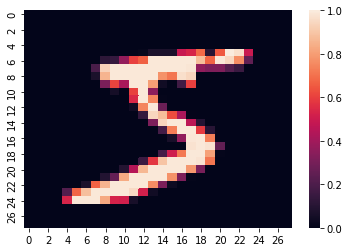

In [ ]:
sns.heatmap(x_train[0])
plt.show()

In [ ]:
model =Sequential([
    Flatten (input_shape=(28,28)),
    Dense(128,activation="relu"),
    Dropout(0.2),
    Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.68633586,  0.44373903, -0.70573044, -0.09723883, -0.16733432,
         0.40661982, -0.5683154 , -0.14921997, -0.1127259 , -0.08747938]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.18862315, 0.1479914 , 0.04688439, 0.08615745, 0.080325  ,
        0.14259881, 0.05379065, 0.08179329, 0.0848334 , 0.08700242]],
      dtype=float32)

In [ ]:
loss_fn= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


In [ ]:
model.compile(optimizer="adam", loss = loss_fn, metrics=["accuracy"])


In [ ]:
 model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3056 - accuracy: 0.9107
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1444 - accuracy: 0.9571
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1080 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0879 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0742 - accuracy: 0.9762


In [ ]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0792 - accuracy: 0.9759 - 738ms/epoch - 2ms/step


[0.07919877022504807, 0.9758999943733215]

In [ ]:
val = model.fit(x_train, y_train, epochs=5, 
validation_data=(x_test, y_test), batch_size=200)


Epoch 1/5
300/300 [==============================] - 3s 8ms/step - loss: 0.0525 - accuracy: 0.9837 - val_loss: 0.0654 - val_accuracy: 0.9798
Epoch 2/5
300/300 [==============================] - 2s 8ms/step - loss: 0.0469 - accuracy: 0.9857 - val_loss: 0.0648 - val_accuracy: 0.9810
Epoch 3/5
300/300 [==============================] - 2s 7ms/step - loss: 0.0443 - accuracy: 0.9867 - val_loss: 0.0621 - val_accuracy: 0.9810
Epoch 4/5
300/300 [==============================] - 3s 10ms/step - loss: 0.0430 - accuracy: 0.9864 - val_loss: 0.0633 - val_accuracy: 0.9809
Epoch 5/5
300/300 [==============================] - 3s 10ms/step - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0618 - val_accuracy: 0.9829


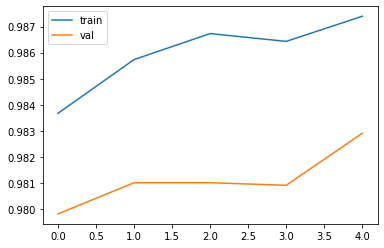

In [ ]:
plt.plot(val.history["accuracy"])
plt.plot(val.history["val_accuracy"])
plt.legend(["train","val"])
plt.show()